# Credit card fraud detection

Anomaly detection application

# 1)- Importing key modules

In [0]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [0]:
import pandas as pd
import numpy as np
import scipy
from numpy import percentile
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy.stats as stats
import matplotlib
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
plt.style.use('ggplot')

In [0]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
# for unsupervised clusters
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [4]:
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Scipy: {}'.format(sklearn.__version__))

Python: 3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]
Numpy: 1.16.4
Pandas: 0.24.2
Seaborn: 0.9.0
Scipy: 1.3.0
Scipy: 0.21.2


# 2)-Loading dataset

In [0]:
df = pd.read_csv('creditcard.csv')

In [6]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [7]:
df.shape

(284807, 31)

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# 3)- Data Exploring

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [12]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
Class,int64
V28,float64
V27,float64
V26,float64
V25,float64
V24,float64
V23,float64
V22,float64
V21,float64
V20,float64


### Missing values check

In [13]:
na_sum = list(df.isnull().sum())
print(len(na_sum))

31


In [14]:
drop_col =[]
for i in range(len(na_sum)):
    if na_sum[i] > 31:
        drop_col.append(na_col[i])
print("We can drop ",len(drop_col)," Columns")

We can drop  0  Columns


In [0]:
# Checking rows now
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

In [16]:
summary_missing(df)

No. of fields:  284807
No. of missing fields:  0


,No. of mising Value,%age of missing Value


### Duplicate values check

In [17]:
df.duplicated().sum()

1081

In [18]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


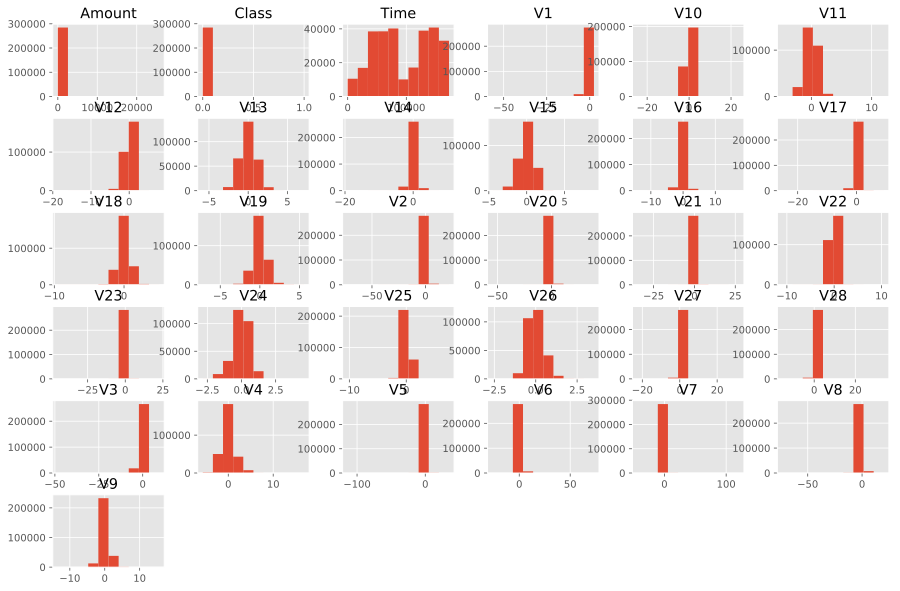

In [19]:
# Plot histograms of each parameter 
df.hist(figsize = (15, 10))
plt.show()

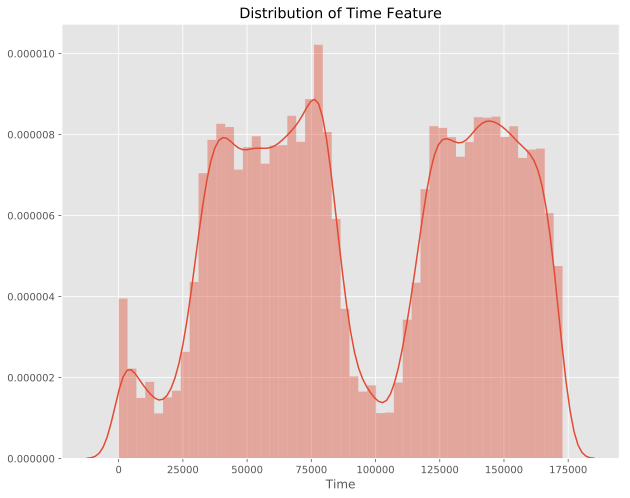

In [20]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

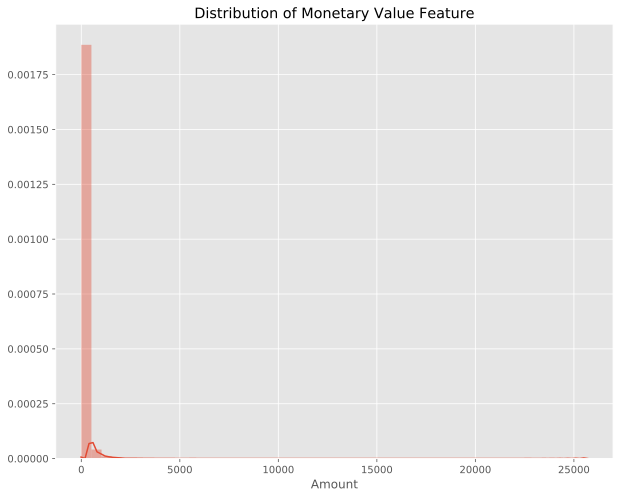

In [21]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [22]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

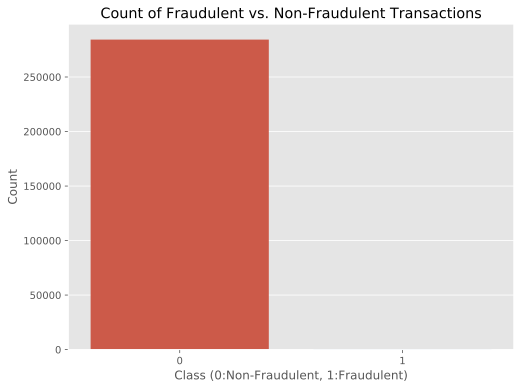

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [24]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.174e-01,-1.059e-02,-4.196e-01,-1.053e-01,1.731e-01,-6.302e-02,8.471e-02,-3.695e-02,-8.660e-03,3.062e-02,-2.477e-01,1.243e-01,-6.590e-02,-9.876e-02,-1.835e-01,1.190e-02,-7.330e-02,9.044e-02,2.898e-02,-5.087e-02,4.474e-02,1.441e-01,5.114e-02,-1.618e-02,-2.331e-01,-4.141e-02,-5.135e-03,-9.413e-03,-1.060e-02,-1.232e-02
V1,0.117,1.000e+00,4.697e-17,-1.424e-15,1.755e-17,6.391e-17,2.398e-16,1.992e-15,-9.491e-17,2.170e-16,7.434e-17,2.439e-16,2.422e-16,-2.115e-16,9.353e-16,-3.252e-16,6.309e-16,-5.012e-16,2.870e-16,1.818e-16,1.037e-16,-1.755e-16,7.477e-17,9.809e-16,7.354e-17,-9.805e-16,-8.622e-17,3.208e-17,9.821e-16,-2.277e-01,-1.013e-01
V2,-0.011,4.697e-17,1.000e+00,2.512e-16,-1.126e-16,-2.040e-16,5.025e-16,3.966e-16,-4.414e-17,-5.729e-17,-4.782e-16,9.469e-16,-6.588e-16,3.855e-16,-2.541e-16,2.831e-16,4.934e-17,-9.883e-16,2.637e-16,9.528e-17,-9.310e-16,8.444e-17,2.501e-16,1.060e-16,-8.142e-18,-4.262e-17,2.602e-16,-4.478e-16,-3.676e-16,-5.314e-01,9.129e-02
V3,-0.420,-1.424e-15,2.512e-16,1.000e+00,-3.417e-16,-1.437e-15,1.432e-15,2.169e-15,3.433e-16,-4.234e-16,6.289e-16,-5.502e-17,2.207e-16,-6.883e-16,4.271e-16,1.123e-16,1.183e-15,4.577e-17,5.428e-16,2.577e-16,-9.429e-16,-2.972e-17,4.648e-16,2.115e-17,-9.352e-17,4.771e-16,6.522e-16,6.240e-16,7.727e-16,-2.109e-01,-1.930e-01
V4,-0.105,1.755e-17,-1.126e-16,-3.417e-16,1.000e+00,-1.941e-15,-2.713e-16,1.556e-16,5.196e-16,3.860e-16,6.055e-16,-2.084e-16,-5.658e-16,-1.506e-16,-8.522e-17,-1.508e-16,-6.939e-16,-4.398e-16,1.494e-16,-2.657e-16,-3.223e-16,-9.977e-17,2.100e-16,6.003e-17,2.230e-16,5.395e-16,-6.180e-16,-6.403e-17,-5.864e-17,9.873e-02,1.334e-01
V5,0.173,6.391e-17,-2.040e-16,-1.437e-15,-1.941e-15,1.000e+00,7.926e-16,-4.210e-16,7.589e-16,4.205e-16,-6.602e-16,7.343e-16,3.761e-16,-9.579e-16,-3.635e-16,-5.133e-16,-3.517e-16,1.426e-16,1.110e-15,-3.138e-16,2.076e-16,-1.369e-16,5.060e-16,1.638e-16,-9.286e-16,5.625e-16,9.145e-16,4.466e-16,-3.299e-16,-3.864e-01,-9.497e-02
V6,-0.063,2.398e-16,5.025e-16,1.432e-15,-2.713e-16,7.926e-16,1.000e+00,1.429e-16,-1.707e-16,1.114e-16,2.851e-16,4.866e-16,2.141e-16,-2.268e-16,3.453e-16,-6.368e-18,-2.478e-16,3.568e-16,2.811e-16,2.717e-16,1.899e-16,-1.576e-16,-3.363e-16,-7.232e-17,-1.262e-15,1.082e-15,-2.378e-16,-2.624e-16,4.813e-16,2.160e-01,-4.364e-02
V7,0.085,1.992e-15,3.966e-16,2.169e-15,1.556e-16,-4.210e-16,1.429e-16,1.000e+00,-8.692e-17,7.933e-16,3.043e-17,-1.084e-15,1.510e-15,-9.892e-17,-1.729e-16,1.937e-17,2.894e-16,1.150e-15,-1.117e-16,-2.874e-16,1.744e-16,1.939e-16,-1.058e-15,2.328e-16,-2.590e-17,1.174e-15,-7.335e-16,-5.887e-16,-6.837e-17,3.973e-01,-1.873e-01
V8,-0.037,-9.491e-17,-4.414e-17,3.433e-16,5.196e-16,7.589e-16,-1.707e-16,-8.692e-17,1.000e+00,2.901e-16,9.052e-17,1.955e-16,-6.266e-17,-2.383e-16,-1.131e-16,2.021e-16,5.027e-16,-3.509e-16,-4.094e-16,-5.340e-16,-1.096e-16,-2.412e-16,5.476e-16,3.897e-16,-1.803e-16,-1.391e-16,-1.210e-16,1.734e-16,-4.484e-16,-1.031e-01,1.988e-02
V9,-0.009,2.170e-16,-5.729e-17,-4.234e-16,3.860e-16,4.205e-16,1.114e-16,7.933e-16,2.901e-16,1.000e+00,-2.772e-16,4.682e-16,-2.445e-15,-2.650e-16,2.343e-16,-1.588e-15,-3.252e-16,6.536e-16,1.204e-16,1.121e-16,-4.341e-16,4.578e-17,2.872e-17,5.929e-16,-2.346e-16,1.100e-15,-1.389e-15,-2.287e-16,9.147e-16,-4.425e-02,-9.773e-02


Text(0.5, 1.0, 'Heatmap of Correlation')

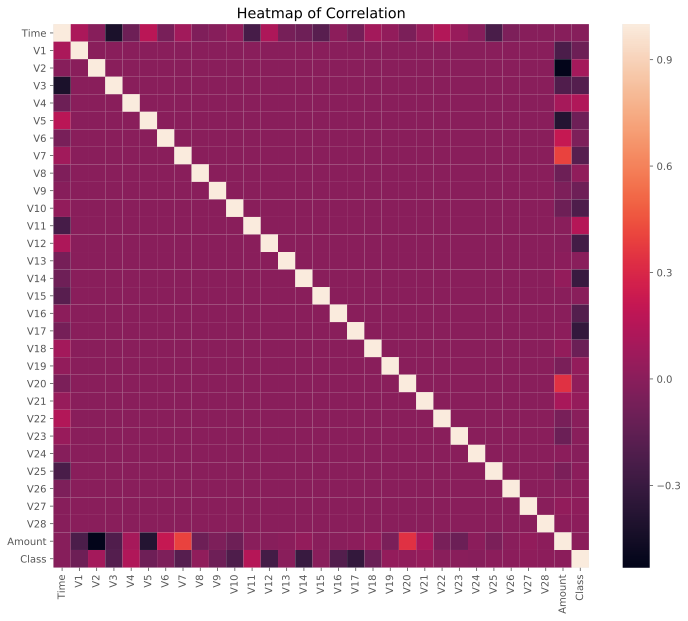

In [25]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [26]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

# 4)- Pre-processing before modeling

### Scaling Amount and Time

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [0]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [29]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
163375,115883.0,-0.748,-0.571,-0.184,-2.186,-0.173,-0.516,1.757,-0.257,-1.623,-0.250,0.140,-0.882,-1.218,0.305,-2.000,0.851,-0.037,-0.951,0.613,0.512,0.428,0.658,0.182,-0.350,0.520,-0.143,-0.053,0.112,275.00,0,0.746,0.444
149049,90510.0,-0.259,1.225,-1.851,0.286,3.999,3.278,0.614,0.734,0.436,-0.931,1.016,-2.905,1.095,0.628,-0.519,-0.780,1.951,0.540,0.278,0.172,-0.116,0.092,-0.251,0.528,0.060,-0.395,0.443,0.267,1.00,0,-0.349,-0.091
226601,144710.0,2.013,-1.042,-3.479,-1.312,2.309,3.019,-0.217,0.519,-1.048,0.949,-0.306,-0.057,-0.050,0.667,-0.053,-2.213,0.090,0.470,-0.793,-0.362,-0.202,-0.262,-0.002,0.746,0.263,0.725,-0.088,-0.069,108.03,0,0.079,1.051
247064,153443.0,1.780,-0.829,-0.600,0.591,-0.678,-0.099,-0.589,0.074,1.292,0.034,-1.155,-0.326,-0.900,0.062,0.759,0.408,-0.491,0.263,-0.485,-0.019,0.305,0.752,0.060,0.706,-0.244,0.425,-0.040,-0.023,119.85,0,0.126,1.235
90927,63237.0,0.763,-1.469,-0.148,-0.335,-1.191,-0.781,0.052,-0.250,-1.083,0.602,1.411,0.333,0.040,0.060,-0.920,0.697,0.449,-1.184,0.926,0.694,0.407,0.484,-0.429,0.606,0.620,-0.129,-0.071,0.051,324.00,0,0.942,-0.665


In [0]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

### Splitting Data into Train and Test

In [31]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256554, 31)
Test Shape: (28253, 31)


In [0]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [33]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0,0.245,-1.997
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0,-0.342,-1.997
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0,1.161,-1.997
3,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0,-0.073,-1.997
4,-0.426,0.961,1.141,-0.168,0.421,-0.030,0.476,0.260,-0.569,-0.371,1.341,0.360,-0.358,-0.137,0.518,0.402,-0.058,0.069,-0.033,0.085,-0.208,-0.560,-0.026,-0.371,-0.233,0.106,0.254,0.081,0,-0.339,-1.997


In [34]:
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0,0.141,-1.997
1,1.449,-1.176,0.914,-1.376,-1.971,-0.629,-1.423,0.048,-1.720,1.627,1.200,-0.671,-0.514,-0.095,0.231,0.032,0.253,0.854,-0.221,-0.387,-0.009,0.314,0.028,0.501,0.251,-0.129,0.043,0.016,0,-0.322,-1.996
2,-2.009,2.199,0.144,1.159,-0.815,0.182,-0.617,1.531,-0.587,0.130,0.658,1.265,-0.207,1.014,-0.549,-0.708,0.870,-0.096,0.944,0.029,0.095,0.295,0.011,0.015,0.034,-0.236,0.128,0.118,0,-0.344,-1.996
3,-0.762,0.128,2.650,-1.876,-0.893,-0.269,-0.420,0.146,-0.870,-0.039,-0.686,-0.503,1.381,-1.039,0.653,1.899,-0.458,-0.560,-0.295,0.359,0.433,1.260,-0.405,0.095,0.481,-0.091,0.319,0.136,0,-0.289,-1.996
4,-0.554,0.216,0.844,-0.753,0.035,-0.559,1.090,-0.204,0.262,-1.355,-0.095,0.954,0.837,0.145,1.157,-1.933,0.741,-0.514,1.567,0.383,0.212,0.702,-0.006,0.147,0.246,-0.440,0.147,0.139,0,0.130,-1.996


### Creating a subsample data set with balanced class distributions

In [35]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 436 fraudulent transactions in the train data.


In [0]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [37]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
230326,2.241,-0.788,-3.889,-1.961,2.635,2.586,-0.115,0.387,-1.219,0.948,0.058,-0.642,-0.235,0.636,-0.124,-0.016,0.468,-1.889,0.617,0.050,0.489,1.339,-0.210,0.807,0.795,0.318,-0.080,-0.096,0,-0.217,1.318
23012,-0.224,0.850,1.637,0.684,0.435,0.002,1.044,-0.346,-0.484,0.449,1.654,0.179,-0.819,0.258,0.687,-0.625,-0.265,0.108,0.300,0.046,0.154,0.774,-0.195,0.225,-0.476,-0.403,-0.273,-0.301,0,-0.280,-1.287
58493,1.151,-0.689,0.904,0.361,-0.715,0.986,-0.838,0.219,1.646,-0.628,-2.307,1.047,1.414,-1.416,-1.633,-0.190,-0.045,-0.446,1.215,0.145,-0.280,-0.388,-0.226,-0.862,0.458,1.105,-0.008,0.014,0,-0.088,-0.915
55749,1.107,-0.073,0.634,0.501,-0.478,-0.077,-0.313,0.166,0.033,0.060,1.533,0.754,-0.424,0.489,0.757,0.335,-0.411,-0.159,-0.319,-0.094,-0.016,-0.119,0.065,0.017,0.132,0.242,-0.015,0.011,0,-0.231,-0.943
13017,1.020,-0.642,1.062,0.066,-0.847,0.879,-0.907,0.502,1.016,-0.371,1.265,1.152,-0.687,-0.187,-0.433,-0.485,0.489,-0.977,0.025,-0.101,-0.113,-0.130,0.107,-0.213,-0.071,0.982,-0.014,0.002,0,-0.193,-1.456


In [0]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [39]:
subsample = pd.concat([selected, fraud])
len(subsample)

872

In [40]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-2.044,3.368,-3.937,5.623,-3.079,-1.253,-5.779,1.707,-4.467,-6.068,3.840,-8.278,1.494,-8.417,0.792,-7.863,-14.571,-5.185,2.414,1.112,1.484,0.834,-0.148,0.002,-0.039,0.390,1.300,0.550,1,-0.323,-1.241
1,1.865,-0.504,-0.754,-0.135,0.436,1.723,-0.907,0.589,1.084,-0.188,1.239,1.372,0.393,0.200,1.226,-0.450,-0.222,-0.444,-1.022,-0.272,0.333,1.227,0.189,-0.721,-0.239,-0.492,0.106,-0.052,0,-0.353,0.688
2,-4.697,2.694,-4.475,5.468,-1.557,-1.549,-4.104,0.554,-1.498,-4.595,5.276,-11.349,0.375,-8.139,0.549,-6.654,-10.247,-4.191,0.991,-0.159,0.574,-0.080,0.318,-0.246,0.338,0.032,-1.508,0.608,1,-0.353,-1.742
3,-4.596,5.084,-7.581,7.546,-6.949,-1.729,-8.190,2.715,-7.083,-11.141,7.382,-14.469,0.300,-13.602,0.516,-13.563,-23.816,-9.171,3.670,1.682,2.249,0.567,0.034,0.592,0.334,0.387,2.164,0.983,1,1.007,-1.130
4,0.468,1.100,-5.607,2.205,-0.579,-0.174,-3.454,1.103,-1.065,-5.416,4.498,-5.020,-1.020,-7.915,0.670,-4.472,-5.857,-2.243,-0.174,0.590,0.983,0.900,-0.285,-1.930,0.320,0.171,0.852,0.372,1,0.129,0.947
5,-3.388,3.978,-6.979,1.658,-1.100,-3.599,-3.687,1.942,-3.065,-7.510,2.990,-5.994,-0.165,-8.388,0.042,-4.138,-6.104,-1.973,0.434,-0.004,1.044,0.262,-0.479,-0.327,-0.157,0.114,0.354,0.288,1,-0.352,1.397
6,-0.971,0.566,0.829,0.019,1.533,0.462,0.870,-0.240,0.263,-0.159,-1.882,-0.072,0.359,-0.544,-0.664,-0.269,-0.682,-0.537,-0.390,-0.305,-0.121,0.025,-0.454,-1.293,-0.025,-0.522,-0.349,-0.034,0,-0.238,-0.221
7,-1.554,1.694,-0.903,2.425,-2.900,0.133,-0.286,0.556,-1.395,-2.893,1.962,-2.385,0.458,-3.725,1.844,-2.014,-2.816,-1.092,0.140,-0.032,0.493,0.733,0.202,0.492,-0.184,-0.200,0.395,0.028,1,1.086,-0.944
8,-6.423,1.659,-5.866,2.052,-0.616,-3.372,-5.037,2.643,-2.275,-7.049,3.917,-4.481,-1.027,-7.114,-0.853,-3.840,-5.056,-1.344,1.148,-0.714,0.641,-0.257,-2.337,-0.158,1.199,-0.261,0.780,-0.732,1,-0.353,1.053
9,1.159,2.845,-4.051,4.778,2.949,-2.010,1.744,-0.410,-2.450,-2.042,1.844,-2.426,-1.584,-7.208,0.460,2.375,6.444,2.592,-2.890,-0.059,-0.177,-0.433,-0.529,-0.597,1.336,0.547,0.010,0.161,1,-0.349,-1.148


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

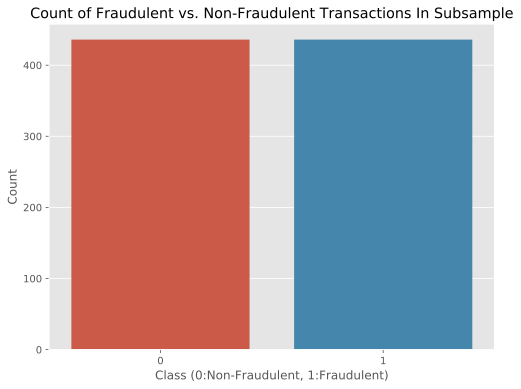

In [41]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [42]:
new_counts

1    436
0    436
Name: Class, dtype: int64

In [43]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.429
V2,0.493
V3,-0.577
V4,0.711
V5,-0.363
V6,-0.411
V7,-0.477
V8,0.053
V9,-0.545
V10,-0.634


In [44]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.577
V9,-0.545
V10,-0.634
V12,-0.679
V14,-0.748
V16,-0.601
V17,-0.558


In [45]:
# positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.711
V11,0.688
Class,1.000


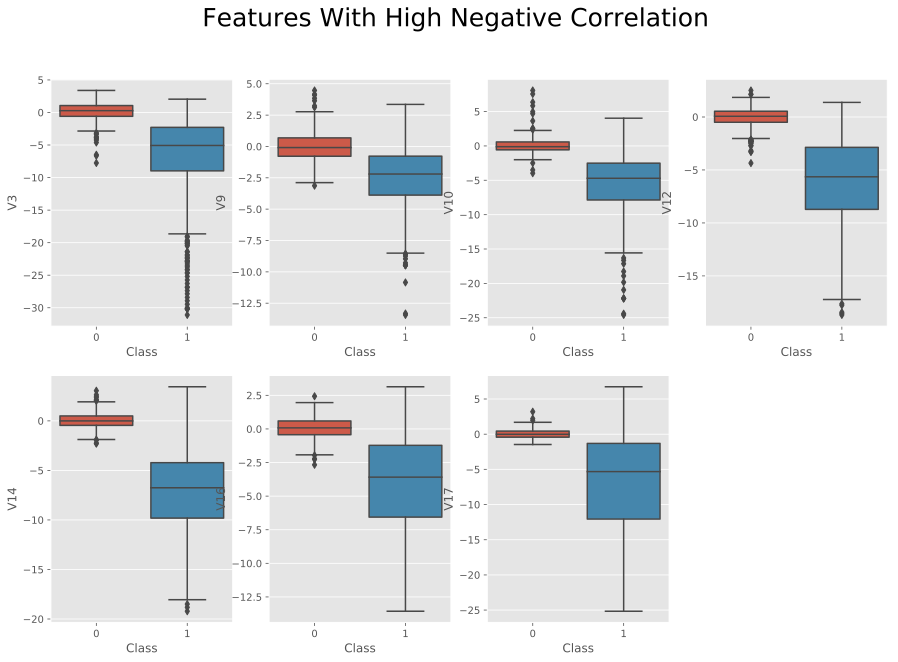

In [46]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

f.suptitle('Features With High Negative Correlation', size=25)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

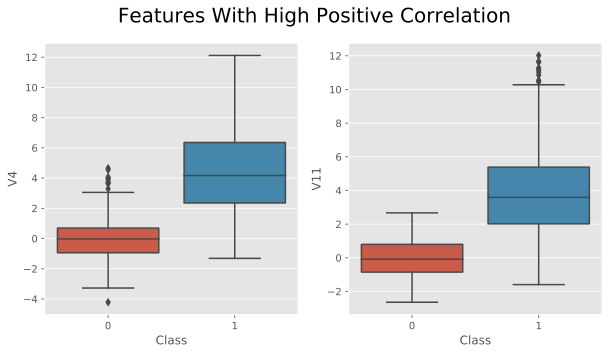

In [47]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

# 5)-Extreme Outlier Removal

**Tukey IQR**

Identifies extreme values in data Outliers are defined as:<br>
Values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1)<br>
Standard deviation from the mean is another common method to detect extreme values But it can be problematic:
Assumes normality<br>
Sensitive to very extreme values

In [0]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [49]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 872 transactions by 254 transactions to 618 transactions.


# 6)-Dimensionality Reduction

In [0]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [51]:
X[:5]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
0,-2.044,3.368,-3.937,5.623,-3.079,-1.253,-5.779,1.707,-4.467,-6.068,3.840,-8.278,1.494,-8.417,0.792,-7.863,-14.571,-5.185,2.414,1.112,1.484,0.834,-0.148,0.002,-0.039,0.390,1.300,0.550,-0.323,-1.241
1,1.865,-0.504,-0.754,-0.135,0.436,1.723,-0.907,0.589,1.084,-0.188,1.239,1.372,0.393,0.200,1.226,-0.450,-0.222,-0.444,-1.022,-0.272,0.333,1.227,0.189,-0.721,-0.239,-0.492,0.106,-0.052,-0.353,0.688
4,0.468,1.100,-5.607,2.205,-0.579,-0.174,-3.454,1.103,-1.065,-5.416,4.498,-5.020,-1.020,-7.915,0.670,-4.472,-5.857,-2.243,-0.174,0.590,0.983,0.900,-0.285,-1.930,0.320,0.171,0.852,0.372,0.129,0.947
5,-3.388,3.978,-6.979,1.658,-1.100,-3.599,-3.687,1.942,-3.065,-7.510,2.990,-5.994,-0.165,-8.388,0.042,-4.138,-6.104,-1.973,0.434,-0.004,1.044,0.262,-0.479,-0.327,-0.157,0.114,0.354,0.288,-0.352,1.397
6,-0.971,0.566,0.829,0.019,1.533,0.462,0.870,-0.240,0.263,-0.159,-1.882,-0.072,0.359,-0.544,-0.664,-0.269,-0.682,-0.537,-0.390,-0.305,-0.121,0.025,-0.454,-1.293,-0.025,-0.522,-0.349,-0.034,-0.238,-0.221


In [52]:
y[:5]

0    1
1    0
4    1
5    1
6    0
Name: Class, dtype: int64

In [0]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

### t-SNE scatter plot

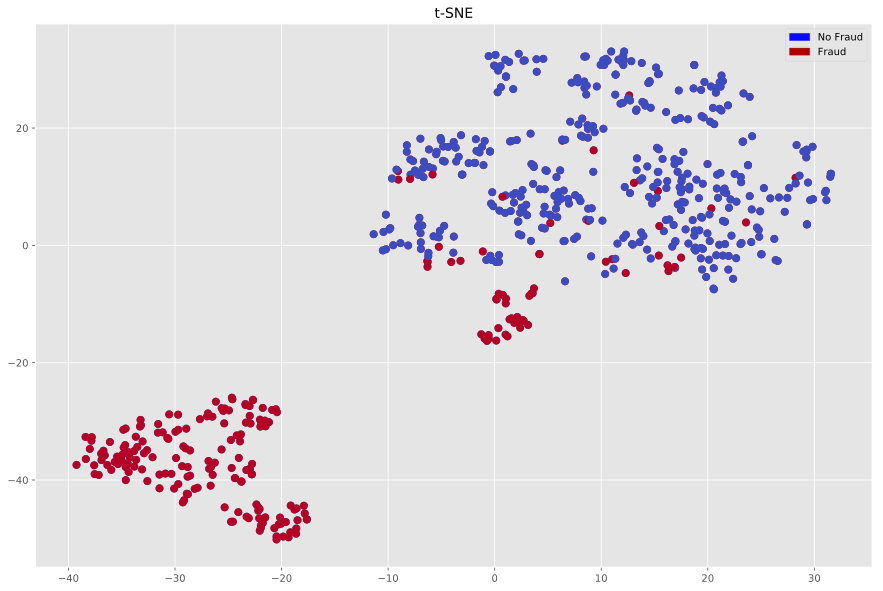

In [54]:
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(15,10))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

# 7)- Unsupervised Outlier Detection

**Local Outlier Factor (LOF)**

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood.<br>

**Isolation Forest Algorithm**

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.<br>
Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.<br>
This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.
Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.<br>


In [55]:
# Determine number of fraud cases in dataset

Fraud = df[df['Class'] == 1]
Valid = df[df['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [0]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [57]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

Isolation Forest: 222
0.6407766990291263
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       394
           1       1.00      0.01      0.02       224

    accuracy                           0.64       618
   macro avg       0.82      0.50      0.40       618
weighted avg       0.77      0.64      0.50       618

Local Outlier Factor: 226
0.6343042071197411
              precision    recall  f1-score   support

           0       0.64      0.99      0.78       394
           1       0.00      0.00      0.00       224

    accuracy                           0.63       618
   macro avg       0.32      0.50      0.39       618
weighted avg       0.41      0.63      0.49       618



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


<Figure size 648x504 with 0 Axes>

# 8)-Classification Algorithms

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [61]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (494, 30) (124, 30) 

Y_shapes:
 Y_train: Y_validation:
 (494,) (124,)


In [62]:
type(X_train)

numpy.ndarray

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.974103 (0.019619)
LDA: 0.971366 (0.019204)
KNN: 0.963535 (0.019429)
CART: 0.901138 (0.043882)
SVM: 0.961493 (0.034065)
XGB: 0.973951 (0.020278)
RF: 0.946794 (0.041349)


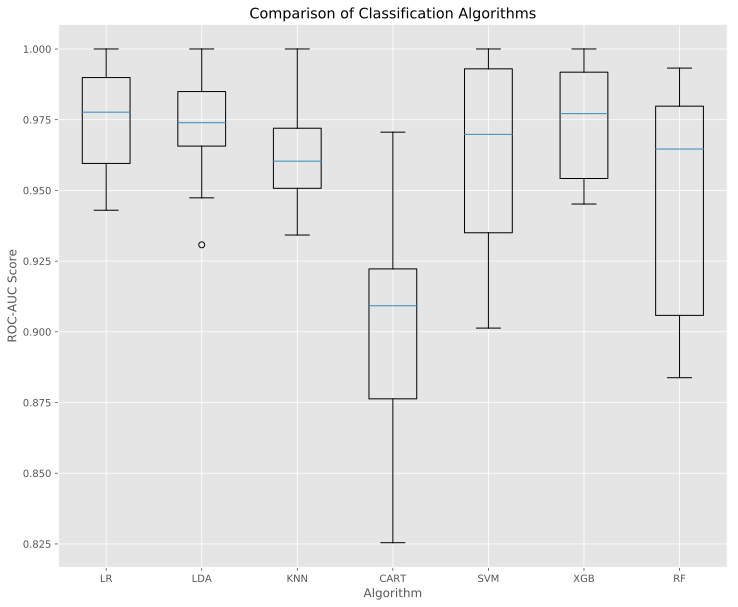

In [65]:
#Compare Algorithms' results

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

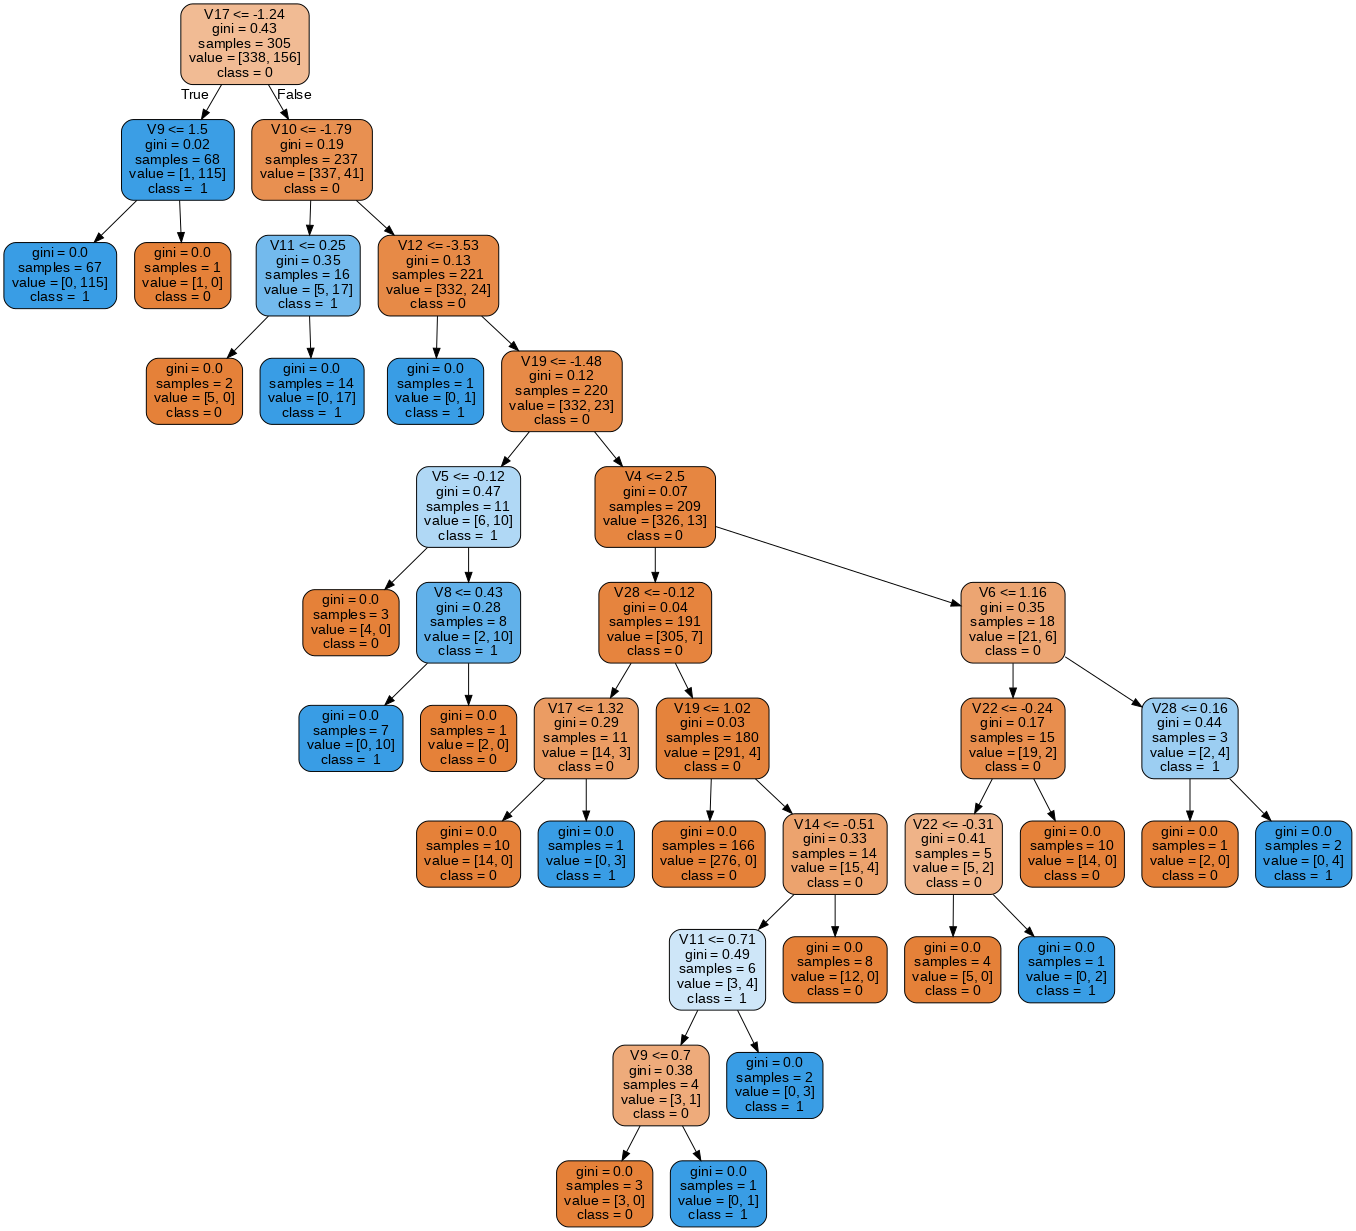

In [66]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=70'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')